In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
#create a dataframe from a file using pandas
file = '../Resources/Capitals.csv'
# The correct encoding must be used to read the CSV in pandas
weather = pd.read_csv(file, encoding="ISO-8859-1")
weather.reset_index(inplace=True)
weather.columns

Index(['index', 'Country', 'Cities', 'Country Code'], dtype='object')

In [3]:
# set up additional columns to hold information
weather['Temperature'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

#print(response['main']['temp'])
# use iterrows to iterate through pandas dataframe
for index, row in weather.iterrows():

    # iterate thru each row of the file
    city = row['Cities']
    url = base_url + "appid=" + "082ff2cde1d396b2b896b2335daad199" + "&q=" + city +"&units=imperial"

# assemble url and make API request
    response = requests.get(url).json()
   
    #update the dataframe 
    try:
        weather.loc[index, 'Temperature'] = response['main']['temp']
        print(response['main']['temp'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

55.4
Missing field/result... skipping.
81.97
43.27
80.6
Missing field/result... skipping.
75.27
48.2
49.51
45.46
53.6
34.83
77.05
71.73
32.95
32
40.82
89.06
69.8
19.08
86
48.2
64.4
84.2
78.46
41.16
91.4
61.83
80.6
75.2
36.75
73.27
66.2
87.8
72.88
54.03
60.8
39.43
77
77
78.3
82.2
49.57
78.42
Missing field/result... skipping.
38.86
34.86
84.2
38.34
82.56
82.8
56.84
64.2
86.97
38.35
62.01
60.3
30.61
59
Missing field/result... skipping.
86
26.51
45.45
78.8
84.2
77
53.6
37.44
84.2
81.37
36.09
77
79.83
80.6
82.4
Missing field/result... skipping.
79.48
54.07
44.15
88.14
79.93
57.24
73.4
37.62
Missing field/result... skipping.
47.17
38.98
51.82
49.35
30.2
63.77
Missing field/result... skipping.
Missing field/result... skipping.
68
51.8
78.8
32.14
48.63
42.03
82.4
47.01
45.81
35.51
41.14
50.09
64.4
65.07
79.09
50.4
86
56.03
85.1
69.8
46.09
81.09
51.91
49.32
12.2
50.97
53.26
68.76
Missing field/result... skipping.
63.34
Missing field/result... skipping.
62.6
39.06
60.28
95
93.2
74.07
45
36.05
30

In [4]:
weather.head()

,index,Country,Cities,Country Code,Temperature
0,0,Afghanistan,Kabul,AF,55.4
1,1,Albania,Tirana (Tirane),AL,
2,2,Algeria,Algiers,DZ,81.97
3,3,Andorra,Andorra la Vella,AD,43.27
4,4,Angola,Luanda,AO,80.6


In [5]:
weather.to_csv('../Outputs/WeatherbyCity.csv')

In [6]:
happiness = '../Resources/WorldHappinessReport.csv'
happinessReport = pd.read_csv(happiness)

happinessnew = happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()

,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [7]:
happinessnew_2017 = happinessnew[happinessnew['year']== 2017]
happinessnew_2017 = happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()


,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [8]:
DF=pd.merge(weather, happinessnew_2017, on="Country", how='inner',suffixes=("","") )
DF['Temperature'] = pd.to_numeric(DF['Temperature'],errors='coerce')
DF.head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,55.40,2017,2.661718
1,1,Albania,Tirana (Tirane),AL,NaN,2017,4.639548
2,2,Algeria,Algiers,DZ,81.97,2017,5.248912
3,6,Argentina,Buenos Aires,AR,75.27,2017,6.039330
4,7,Armenia,Yerevan,AM,48.20,2017,4.287736


NameError: name 'ax' is not defined

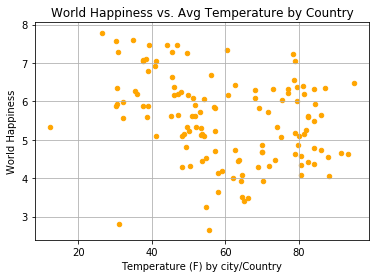

In [12]:
plt.scatter(DF["Temperature"], DF["Life Ladder"], c="orange", marker="o", s=20)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.xlabel("Temperature (F) by city/Country")
plt.ylabel("World Happiness")
plt.grid(True)

(slope, intercept, r, p, error) = linregress(DF['Temperature'], DF["Life Ladder"])
# print("Music Energy vs country happiness is not a statistically significant model.  R sqr= " + str(r) + ' P-Value= ' + str(p))

fit = slope * DF["Temperature"] + intercept

#ax.plot(X_axis, Y_axis, linewidth=0, marker='o') #plot each instance
ax.plot(DF["Life Ladder"], fit, 'r--') #plot the regresion calc, with a red dotted line
# plt.show()
#regression
# slope, intercept, r_value, p_value, std_err = linregress(DF["Temperature"], DF["Life Ladder"])

# line = slope*DF["Temperature"]+intercept
# plt.plot(DF["Temperature"], line, 'r', label='DF["Life Ladder"]={:.2f}DF["Temperature"]+{:.2f}'.format(slope,intercept))
# plt.show()         

In [ ]:
#save to graph folder as png
